In [1]:
data_dir = '/home/cadel/data/deduce/Ste08'

In [29]:
import pandas as pd
import os
import seaborn as sns

In [4]:
def read_bed(f):
    return pd.read_csv(f, sep="\t", names=["contig", "start", "end"], usecols=[0,1,2])

In [8]:
df = read_bed(os.path.join(data_dir, "bosTau2Head.bed"))

In [49]:
from deduce_uces.algs.merge_doa import CoreKmer, get_candidate_regions
import csv
def read_bed(fname):
    with open(fname) as f: 
        reader = csv.reader(f, delimiter="\t")

        for row in reader:
            yield CoreKmer(
                id=row[3],
                sequence="A",
                contig=row[0],
                position=int(row[1]),
                seq=""
            )

df = [bed for bed in read_bed(os.path.join(data_dir, "bosTau2.bed"))]

In [50]:
all_cks = set(x.id for x in df)
print("Total core kmers: ", len(all_cks))

regions = get_candidate_regions(df, 200, 3)
cks_in_region = set()
for r in regions:
    for ck in r:
        cks_in_region.add(ck.id)

print("Filtered core kmers: ", len(cks_in_region))


Total core kmers:  3274024
Filtered core kmers:  320437


In [21]:
grouped_by_start_pos = df.groupby(['contig', 'start']).count()
grouped_by_start_pos = grouped_by_start_pos.reset_index(level=['contig', 'start'])
grouped_by_start_pos

,contig,start,end
0,chr1,2936,1
1,chr1,2937,2
2,chr1,36496,1
3,chr1,36497,4
4,chr1,36500,24
...,...,...,...
3606,chr1,1681274,99
3607,chr1,1681275,109
3608,chr1,1681276,75
3609,chr1,1681277,77


In [27]:
# https://stackoverflow.com/a/52907485
grouped_by_start_pos['run'] = (grouped_by_start_pos['start'] != grouped_by_start_pos['start'].shift() + 1).astype(int).cumsum()

run_length = grouped_by_start_pos.groupby(['run']).count()


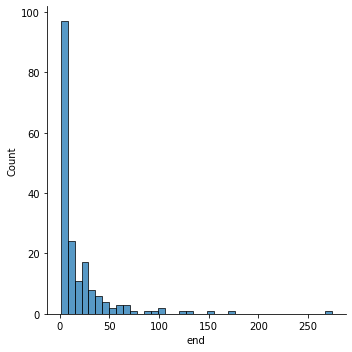

In [32]:
run_length
sns.displot(run_length, x="end")